## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [114]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [115]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [116]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [117]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [118]:
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [119]:
df.query('group == "treatment"')['landing_page'].value_counts()[1] + \
df.query('group == "control"')['landing_page'].value_counts()[1]

3893

f. Do any of the rows have missing values?

In [120]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [121]:
df2 = df

In [122]:
df2.shape

(294478, 5)

In [123]:
df2[df2['group'] == 'treatment'].query('landing_page == "old_page"').shape

(1965, 5)

In [124]:
# Removing all such rows
df2.drop(df2[df2['group'] == 'treatment'].query('landing_page == "old_page"').index, inplace=True)

In [125]:
df2.shape

(292513, 5)

In [126]:
df2[df2['group'] == 'control'].query('landing_page == "new_page"').shape

(1928, 5)

In [127]:
df2.drop(df2[df2['group'] == 'control'].query('landing_page == "new_page"').index, inplace=True)

In [128]:
df2.shape

(290585, 5)

In [129]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [130]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [131]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [132]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [133]:
df2.drop(1899, inplace=True)

In [134]:
# Double check if any duplicate user_id exists in the dataframe df2
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [135]:
df2[df2['converted'] == 1].shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [136]:
control_conversion = df2[df2['converted'] == 1].query('group == "control"').shape[0] / df2[df2['group'] == 'control'].shape[0]
control_conversion

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [137]:
treatment_conversion = df2[df2['converted'] == 1].query('group == "treatment"').shape[0] / df2[df2['group'] == 'treatment'].shape[0]
treatment_conversion

0.11880806551510564

d. What is the probability that an individual received the new page?

In [138]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [139]:
obs_diff = treatment_conversion - control_conversion
obs_diff

-0.0015782389853555567

**There is not a considerable difference in the probabilities of conversion given that an individual was in the control group or treatment group respectively, adding the fact that the probability of an individual receiving the new page is 50 percent. Hence, there isn't any evidence uptil now to suggest that one page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **Null (H0) : p_new - p_old <= 0**
- **Alternative(H1) : p_new - p_old > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [140]:
# probability of an individual converting regardless of the page they receive
p_new = df2[df2['converted'] == 1].shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [141]:
# probability of an individual converting regardless of the page they receive
# Assuming that p_new = p_old under the null hypothesis as stated above
p_old = df2[df2['converted'] == 1].shape[0] / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [142]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [143]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [144]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [145]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [146]:
new_page_converted.mean() - old_page_converted.mean()

-0.0005046704229194482

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [147]:
p_diffs = []
for _ in range(10000):
    new_bootsample = np.random.binomial(1, p_new, n_new)
    old_bootsample = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_bootsample.mean() - old_bootsample.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

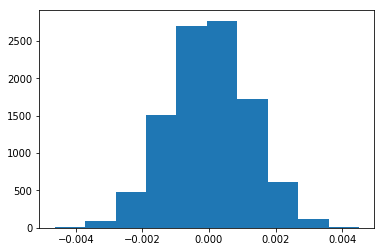

In [148]:
plt.hist(p_diffs);

The plot looks in accordance with a normally distributed histogram owing  to the theorems namely:
- Law of Large Numbers
- Central Limit Theorem

In [149]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

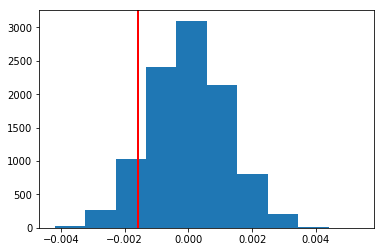

In [150]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='r', linewidth=2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [151]:
(null_vals > obs_diff).mean()

0.9044

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This gives us a p-value of 0.9 approximately. This is considered a large p-value which suggests that we shouldn't move away from our null hypothesis i.e. there is not much significant difference in conversions with new page as compared to the old page and hence the company should not be implementing the new page in the current form.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [152]:
convert_old = df2[df2['converted'] == 1].query('group == "control"').shape[0]
convert_new = df2[df2['converted'] == 1].query('group == "treatment"').shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

In [153]:
convert_old, convert_new

(17489, 17264)

In [154]:
n_old, n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [155]:
from statsmodels.stats.proportion import proportions_ztest

In [156]:
z_stat, p_value = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
z_stat, p_value

(1.3109241984234394, 0.09494168724097551)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

** The p-value associated with a 95% confidence level is 0.05. Since Z score (1.31) is between -1.96 and +1.96, and p-value (0.09 ~ 0.10) is larger than 0.05, we cannot reject the null hypothesis. Hence, this is in agreement with the finding in parts j. and k. The company should not implement the new page yet.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**This is a classic case of Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [157]:
df2['intercept'] = 1

In [158]:
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']

In [159]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [163]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [164]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [165]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:05:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value associated with ab_page comes out to be 0.190 ~ 0.2 and its different than that from Part II (which is 0.10 approximately) because of the fact that in part II we had performed one-tailed test and here in part III we have performed a two-tailed test. **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Yes, it is a good idea to consider other factors to be added into our regression model so as to check for the correlation among different explanatory variables in predicting the response variables.**

#### Advantages of adding additional terms into Regression model:
- First is the ability to determine the relative influence of one or more predictor variables in predicting the response variable.
- Second is to identify the outliers. For e.g. in our particular case it could have been possible than one particular country might have had higher or lower conversion rates.

#### Disadvantages of adding additional terms into Regression model:
- First could be incomplete data which gives the false result which can then be used for decision making. For e.g. if the data related to a particular country was not sufficient and its concluded that the conversion rate for that country is low.
- Second if concluding that a correlation is causation. For e.g. believing that country is the sole factor in determining the conversion rates would be a wrong proposition.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [166]:
df3 = pd.read_csv('countries.csv')
df3.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [167]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [168]:
df2.shape

(290584, 7)

In [169]:
df2 = df2.merge(df3, left_on='user_id', right_on='user_id')
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [170]:
df2.shape

(290584, 8)

In [171]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [172]:
df2 = df2.drop(['country', 'CA'], 1)

In [173]:
df2.sample(20)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
265427,722448,2017-01-20 16:47:29.659304,control,old_page,0,1,0,1,0
182334,687070,2017-01-09 07:34:52.662049,treatment,new_page,0,1,1,0,1
209660,915932,2017-01-17 17:08:21.234326,control,old_page,1,1,0,0,1
147796,762767,2017-01-15 13:46:49.525912,control,old_page,0,1,0,1,0
261845,686656,2017-01-15 17:42:50.701262,treatment,new_page,0,1,1,1,0
49964,791713,2017-01-20 17:16:53.629004,control,old_page,0,1,0,0,1
152057,637064,2017-01-20 05:09:35.498195,treatment,new_page,0,1,1,0,1
215030,681071,2017-01-10 06:38:48.809434,control,old_page,1,1,0,0,1
164618,835946,2017-01-04 11:55:50.180424,control,old_page,0,1,0,0,1
138038,814332,2017-01-13 12:06:57.786756,treatment,new_page,0,1,1,0,1


In [174]:
logit_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'UK', 'US']])
results2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [175]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        18:05:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

It does not look that country has an impact on coversions. The p-values for both UK and US come out to be 0.074 ~ 0.1 and 0.129 ~ 0.1 respectively.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [176]:
df2['ab_page_UK'] = df2['ab_page'] * df2['UK']

In [177]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,ab_page_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0


In [178]:
df2['ab_page_US'] = df2['ab_page'] * df2['US']

In [179]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0


In [180]:
logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page_UK', 'ab_page_US', 'ab_page', 'UK', 'US']])
results3 = logit_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [182]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:               3.482e-05
Time:                        18:05:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

Introducing interactions in our Logistic Regression model has brought to light a really interesting insight that the coversion rate for UK (0.767) are a bit higher than those of US (0.642). Hence, we gain a significant insight that  country has an impact on conversion rate.

<a id='conclusions'></a>
## Finishing Up


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [183]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0